In [84]:
library(randomForest)

In [85]:
dat <- read.table('gene_EC_cluster_treelength_krkc.csv', head = T, sep = ',', row.names = 1, 
                 stringsAsFactors = F)
#dat_NA <- 

In [86]:
head(dat)

,Gene_name,EC_number,cluster_id,tree_length,krkc
1,EOG400048,1,13,8.010396,5.833333
2,EOG408KV3,1,13,2.936836,2.315789
3,EOG408KVF,1,14,6.500538,3.677419
4,EOG40GBB2,1,30,3.852393,2.101695
5,EOG41ZCVW,1,0,6.799851,3.340659
6,EOG42284D,1,14,3.240976,3.139535


I will fit the RF with the following model:

cluster_id ~ EC_number + tree_length + krkc

In [87]:
target <- factor(dat[, 'cluster_id'])
predictors <- data.frame(EC = factor(dat$EC_number), tl = as.numeric(dat$tree_length), 
                   krkc = as.numeric(dat$krkc))

In [88]:
rf1 <- randomForest(y = target, x = predictors)

In [89]:
importance(rf1)

,MeanDecreaseGini
EC,25.23337
tl,63.80089
krkc,59.8963


A lower Gini coefficient, such that tree length has the highest explanatory power, followed by krkc, and Ec number. However, note that the error rate is very high (70%), which means that predicting cluster assignment is difficult with these variables.

In [94]:
rf1


Call:
 randomForest(x = predictors, y = target) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 70.03%
Confusion matrix:
   0 1 2 3 4 5 6 7 9 11 12 13 14 16 17 20 21 22 24 25 26 28 30 31 32 34 36 38
0  0 0 0 0 0 0 0 0 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0 0 0 0 0 0 0 0 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
2  0 0 0 0 0 0 0 0 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
3  0 0 0 0 0 0 0 0 0  0  0  0  5  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
4  0 0 0 0 0 0 0 0 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
5  0 0 0 0 0 0 0 0 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
6  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
7  0 0 0 0 0 0 0 0 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
9  0 0 0 0 0 0 0 0 0  0  0  0  3  0  0  0  0  0  0

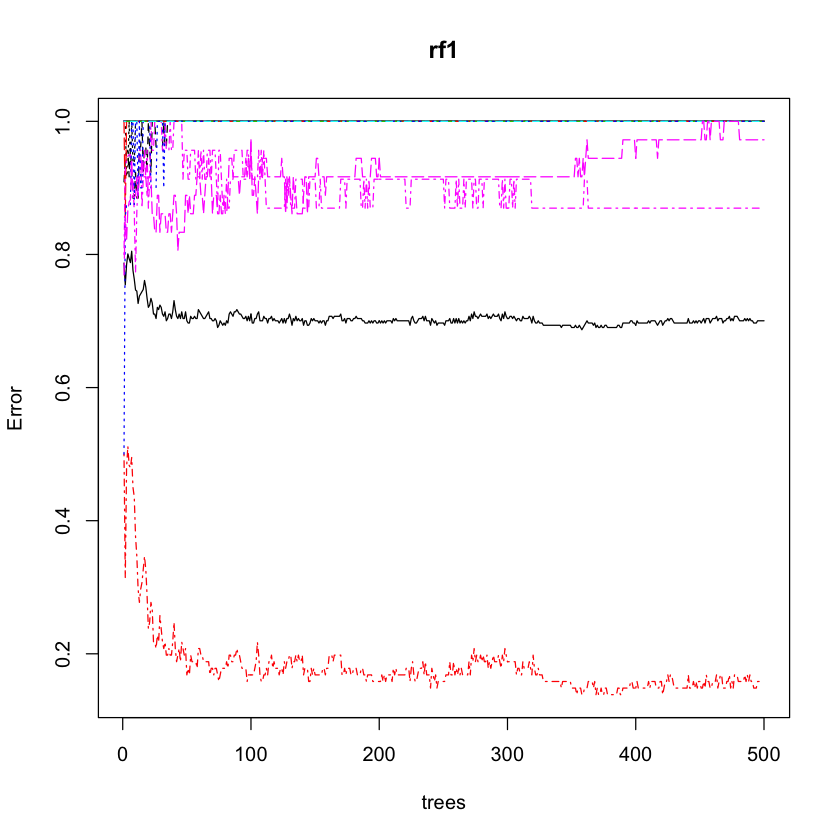

In [95]:
plot(rf1)